In [ ]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
star = Star()
star.set_blackbody_spectrum()

In [3]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3

model.add_density(density, "yso.dst")
model.add_star(star)

Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 0.0 (insufficient CUDA driver version!)
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.7.0
Warp UserWarning: 
   Insufficient CUDA driver version.
   The minimum required CUDA driver version is 12.0, but the installed CUDA driver version is 0.0.
   Visit https://github.com/NVIDIA/warp/blob/main/README.md#installing for guidance.


Warp CUDA error: Could not open libcuda.so.
Warp CUDA error: Function cuDriverGetVersion_f: a suitable driver entry point was not found
Warp CUDA error 36 (in function cuda_driver_version, /builds/omniverse/warp/warp/native/warp.cu:1719)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc

In [4]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0
Module pinballrt.sources f5dedf3 load on device 'cpu' took 4.44 ms  (cached)
Module pinballrt.grids 237c235 load on device 'cpu' took 10662.48 ms  (compiled)
Module pinballrt.utils 08b2efb load on device 'cpu' took 1.45 ms  (cached)


100%|██████████| 1000000/1000000 [00:04<00:00, 227489.85it/s]


0
Iteration 1


100%|██████████| 1000000/1000000 [00:43<00:00, 23251.28it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:43<00:00, 23147.92it/s]


2 1.1616004 230.01974
Iteration 3


100%|██████████| 1000000/1000000 [00:52<00:00, 19069.58it/s]

3 1.192686 1.026761


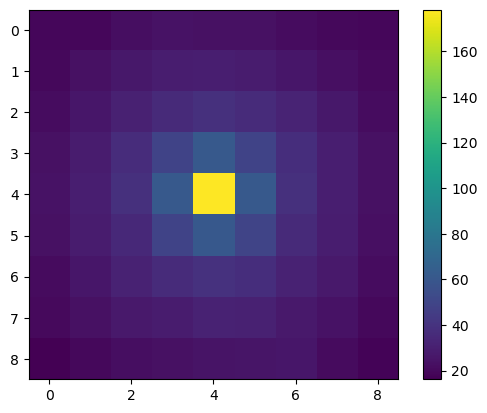

In [5]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [6]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, lam=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu')

100%|██████████| 100000/100000 [00:06<00:00, 14506.65it/s]


Time: 7.548181772232056


100%|██████████| 100000/100000 [00:00<00:00, 548627.16it/s]


Time: 0.7414956092834473
65536
Module pinballrt.camera c7d3b15 load on device 'cpu' took 0.62 ms  (cached)


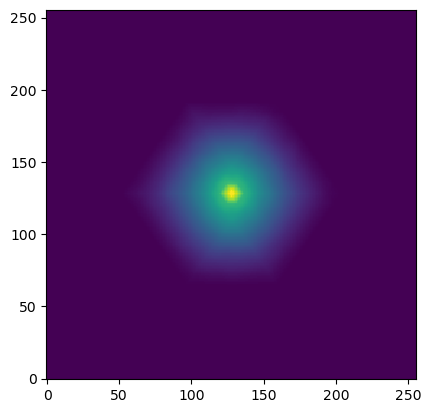

In [9]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()